# **3장 기초 인공 신경망 모델**

## **3-1절 인공 신경망의 구조와 원리**

📌[실습 03-01] 라이브러리 설치하기

In [ ]:
!pip install koreanize_matplotlib  # 한글폰트 설치
import koreanize_matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import warnings; warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.5 MB/s eta 0:00:00


📌[실습 03-02] 실습 데이터 생성하기

In [ ]:
np.random.seed(0)
n=1000
x1=np.random.uniform(-3, 3, n)   # 피처1
x2=np.random.uniform(-3, 3, n)   # 피처2

# 타깃: y=f(x1,x2), 복잡한 비선형 함수 생성
y=np.sin(x1) * np.log(x2**2) + np.exp(-x1**2 - x2**2)

print("x1:", x1[:5]); print("x2:", x2[:5]); print("y:", y[:5])   # 처음 5개 출력


x1: [ 0.29288102  1.2911362   0.61658026  0.2692991  -0.4580712 ]
x2: [ 0.55728162 -2.93961783 -0.14504282  1.25262235 -2.73614741]
y: [ 0.33516589  2.0728087  -1.56336879  0.31352531 -0.88977731]


📌[실습 03-03] 피처와 타깃 간의 관계를 나타내는 산점도 그리기

Text(0, 0.5, 'y')

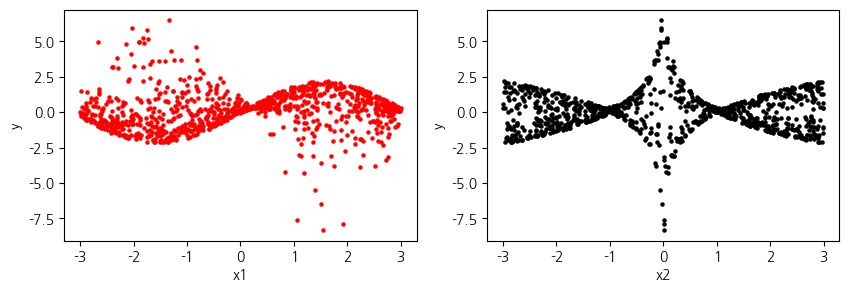

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(x1, y, s=5, color="r")  # s는 점의 크기 조절 옵션
plt.xlabel('x1'); plt.ylabel('y')
plt.subplot(1,2,2)
plt.scatter(x2, y, s=5, color="k")
plt.xlabel('x2'); plt.ylabel('y')


### 탐색적 데이터 분석

📌[실습 03-04] 피처와 타깃 지정하기

In [ ]:
df=pd.DataFrame([])  # 빈프레임 생성
df['x1']=x1          # 열변수 추가
df['x2']=x2
df['y']=y

X=df[["x1","x2"]]    # 피쳐
y=df["y"]            # 타깃

📌[실습 03-05] 선형 회귀 모델에 적용하기

In [ ]:
model = LinearRegression()
model.fit(X, y)

print("가중치(weights) =", model.coef_)
print("편향(bias) =", model.intercept_); print()

y_pred=model.predict(X) # 피쳐 X를 사용하여 모형의 예측값 계산
MSE=mean_squared_error(y, y_pred)
print("평균제곱오차=", MSE)

acc=r2_score(y, y_pred)  # R²예측력 계산
print("R-제곱=", acc)

가중치(weights) = [0.09877415 0.00971141]
편향(bias) = 0.08475303608373774

평균제곱오차= 2.016670831773133
R-제곱= 0.01465792348355377


## 인공신경망 모델 설정하기

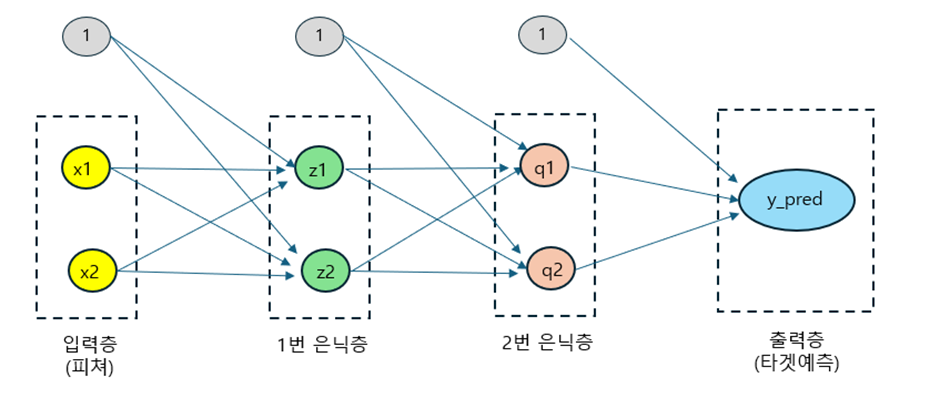

📌[실습 03-06] 인공 신경망 모델 설정하기

In [ ]:
model=Sequential()                # 순차적으로 층을 쌓아가는 Keras의 모형 설정 방법
model.add(Dense(2,input_dim=2 ))  # 1번 은닉층, input_dim은 입력층의 피쳐 수
model.add(Dense(2))               # 2번 은닉층
model.add(Dense(1))               # 출력층
model.summary()                   # 모형구조를 요약

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

📌[실습 03-07] ReLU 활성화 함수 적용하기

In [ ]:
model=Sequential()                                     # 순차적으로 층을 쌓아가는 Keras의 모형 설정 방법
model.add(Dense(2, activation='relu',  input_dim=2 ))  # 1번 은닉층, input_dim은 입력층의 피처 수
model.add(Dense(2, activation='relu'))                 # 2번 은닉층
model.add(Dense(1))                                    # 출력층
model.summary()                                        # 모형구조를 요약

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

**[참고]** 위의 코드와 같이 모델을 설정해도 아무 문제 없지만,
* import warnings; warnings.filterwarnings('ignore')을 사용하지 않으면 경고문이 나올 수 있습니다.
* 최근의 KERAS는 다음과 같이 입력층을 명시적으로 설정하는 방식을 권장합니다.  
* 처리 결과는 정확하게 동일합니다.

In [ ]:
model=Sequential()
model.add(Input(shape=(2,)))               # 입력층 명시(2개 피쳐)
model.add(Dense(2, activation='relu'))     # 1번 은닉층
model.add(Dense(2, activation='relu'))     # 2번 은닉층
model.add(Dense(1, activation='linear'))   # 출력층(회귀문제는 linear 활성화 함수 명시, 명시하지 않아도 기본값으로 적용됨)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

### 인공 신경망 모델 학습하기

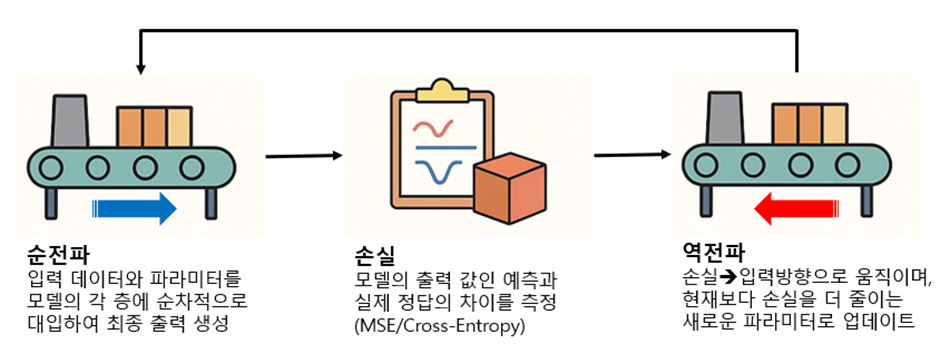

📌[실습 03-08] 컴파일하기 ― 최적화 도구와 손실 함수 설정

In [ ]:
model.compile(optimizer="adam", loss="mse")

랜덤시드 고정 후 인공 신경망 모델 재설정하기

In [ ]:
# 📌[실습 03-09] 랜덤 시드 고정하기 ― 결과 일관성 보장
SEED=42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# 📌 [실습 03-10] 인공 신경망 모델 다시 설정하기
model=Sequential()
model.add(Dense(2, activation='relu',  input_dim=2 ))  # 1번 은닉층, input_dim은 피쳐의 수
model.add(Dense(2, activation='relu'))                 # 2번 은닉층
model.add(Dense(1))                                    # 출력층
model.summary()                                        # 모형구조를 요약

# 컴파일(모델 설정 후 실행)
model.compile(optimizer="adam", loss="mse")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

📌[실습 03-11] 인공 신경망 모델 학습하기

In [ ]:
history=model.fit(X, y, epochs=300)  # epoch은 학습 횟수, 학습과정의 주요 통계를 history 객체에 저장

📌[실습 03-12] 손실 변화 시각화하기

/tmp/ipython-input-2767315747.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(); plt.show()


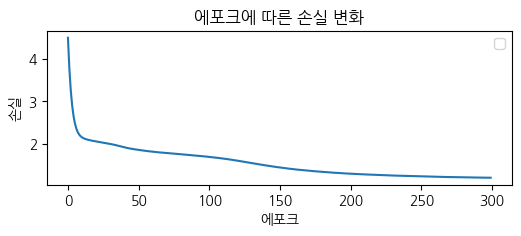

In [ ]:
plt.figure(figsize=(6, 2))

plt.plot(history.history['loss'])
plt.xlabel('에포크')
plt.ylabel('손실')
plt.title('에포크에 따른 손실 변화')
plt.legend(); plt.show()

- 만족스럽지 않으면 학습을 반복

### 학습된 모델의 성능 평가하기

📌[실습 03-13] 예측 성능 시각화하기

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


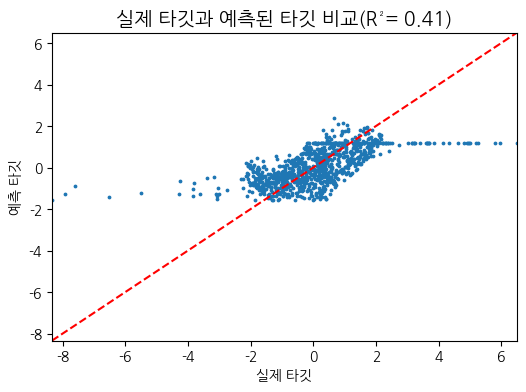

In [ ]:
y_pred=model.predict(X)    # 예측 수행
r2=r2_score(y, y_pred)      # R2 계산

plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred, s=3)  # s는 점의 크기 조절
plt.axis([min(y), max(y), min(y), max(y)])
plt.plot([min(y), max(y)], [min(y), max(y)], ls="--", c="r")
plt.title(f'실제 타깃과 예측된 타깃 비교(R²= {r2:.2f})', fontsize=14)
plt.xlabel('실제 타깃'); plt.ylabel('예측 타깃');
plt.show()

### 모델 구조 개선하기



📌[실습 03-14] 모델 구조를 개선하고 예측 결과 시각화하기

In [ ]:
# 신경망 모형 재설정
model=Sequential()
model.add(Dense(16, activation='relu',  input_dim=2 ))  # 1번 은닉층, input_dim은 피쳐의 수
model.add(Dense(16, activation='relu'))                 # 2번 은닉층
model.add(Dense(16, activation='relu'))                 # 3번 은닉층
model.add(Dense(1))                                     # 출력층
model.summary()

model.compile(optimizer="adam", loss="mse") # 컴파일
history=model.fit(X, y, epochs=300)       # 학습

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
# 학습과정 시각화
plt.plot(history.history['loss'])
plt.xlabel('에포크')
plt.ylabel('손실')
plt.title('에포크에 따른 손실 변화')

plt.subplot(1, 2, 2)
# 타겟 예측 및 R^2
y_pred = model.predict(X)
r2=r2_score(y, y_pred)
plt.scatter(y, y_pred, s=3)  # s는 점의 크기 조절
plt.axis([min(y), max(y), min(y), max(y)])
plt.plot([min(y), max(y)], [min(y), max(y)], ls="--", c="r")
plt.title(f'타깃의 실젯값과 예측값 비교(R²= {r2:.2f})', fontsize=14)
plt.xlabel('실젯값'); plt.ylabel('예측값');
plt.show()

### 새 피쳐에 대한 예측

📌[실습 03-15] 개선된 모델로 타깃 예측하기

In [ ]:
x_new=np.array([[-0.5, 0.2]])  # 예제 입력 (특성 2개)

print("새로운 피처", x_new, "에 대한")

print("타깃 변수의 예측값은 ",  model.predict(x_new), "입니다" )

새로운 피처 [[-0.5  0.2]] 에 대한
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
타깃 변수의 예측값은  [[2.3670864]] 입니다


[실습 03-16] 컴파일 코드의 학습률 변경하기

In [ ]:
from tensorflow.keras.optimizers import Adam # 라이브러리 불러오기
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

📌[실습 03-17] 가중치와 편향 확인하기

In [ ]:
# 추정된 계수를 출력, weight와 bias
keras_weights, keras_bias=model.layers[0].get_weights()
print("Keras Model Weights:", keras_weights.ravel())
print("Keras Model Bias:", keras_bias)

Keras Model Weights: [ 0.35217756  0.20866644 -0.11420126  0.20706593  0.59760785  0.39752322
  0.35902193  0.5547222  -0.18567847  0.34887403 -0.28862035  0.00863194
 -0.13999043 -0.25165072 -0.05327493 -0.33334547 -0.3729111   0.19278137
  0.6230569  -0.7345246  -0.15679872 -0.15667135  0.8808345   0.4853946
 -1.1770085  -0.27801716  0.7380864  -1.1303648   0.84438473 -0.30740926
  0.47767448  0.21879056]
Keras Model Bias: [-0.53867805  0.3568032  -0.15289436  0.2605244  -0.15216458  0.28395575
  0.22136877  0.23630443 -0.22291243  0.19162463  0.24478711  0.3275051
  0.13958067 -0.42162532 -0.08959369  0.12335452]


## [부록] 활성화 함수의 종류 알아보기
- 이 책에서는 Relu와 Softmax 활성화 함수만 사용하지만 다른 활성화 함수는 다음 링크를 참조하세요.

https://heeya-stupidbutstudying.tistory.com/entry/ML-%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98Activation-Function